# Excercise 1

import libraries and load dataset

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

In [2]:
dataset = np.loadtxt('smoking.txt')
dataset.shape

(654, 6)

Split the dataset into smoker and non-smoker groups and calculate the average FEV1 score.

In [3]:
def split_dataset(data): #function to split dataset into smokers and non-smokers
    smokers = []
    non_smokers = []
    for row in data: #check each row, if 5th column value is 0 add to non-smokers, otherwise to smokers
        if row[4] == 0:
            non_smokers.append(row)
        else:
            smokers.append(row)
    return np.asarray(smokers), np.asarray(non_smokers)


smokers, non_smokers = split_dataset(dataset)
print(smokers.shape)
print(non_smokers.shape)

(65, 6)
(589, 6)


In [4]:
def calculate_FEV1(data): #calculate Average FEV1 score
    fev1 = data[:,1]
    return np.sum(fev1)/len(fev1)

smokers_fev1 = calculate_FEV1(smokers)
non_smokers_fev1 = calculate_FEV1(non_smokers)
print("Non Smokers Avg FEV1: ", non_smokers_fev1, " Smokers Avg FEV1: ", smokers_fev1)

Non Smokers Avg FEV1:  2.5661426146010187  Smokers Avg FEV1:  3.2768615384615383


A higher FEV1 score represents better lung function, while a lower score means poorer lung function. Thus, seeing these results is quite suprising as smokers have a higher FEV1 score compared to Non-Smokers whereas it should be the opposite. One would expect on average that a non-smoker has better lung function than a smoker.

# Excercise 2

Plot boxplot for smokers and non-smokers over FEV1

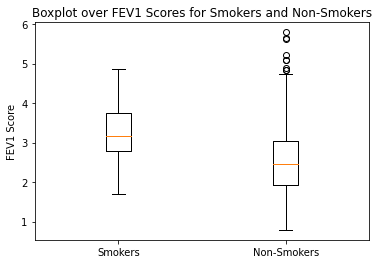

In [5]:
box_plot_data = [smokers[:,1], non_smokers[:,1]] #make array with FEV1 for smokers and non-smokers
labels = ['Smokers', 'Non-Smokers']
plt.boxplot(box_plot_data, labels = labels) #plot the data
plt.title('Boxplot over FEV1 Scores for Smokers and Non-Smokers')
plt.ylabel('FEV1 Score')
plt.show()

Again non-smokers have lower median, q1 and q3, which is quite surprising but can be somewhat explained by the fact that the minimum value for smokers is much larger than non-smokers. One would except non-smokers to have larger values. Taking a closer look at the data however a case can be made for non-smokers having lower values since there are many more datapoints for non-smokers. Non-smokers also have a larger variance for FEV1 and quite a few outliers. 

# Excercise 3

Carry out two tailed t test

We carry out a t test on the FEV1 scores for smokers and non smokers. The hypotheses are:-
\begin{equation}
H_0: \mu_{smokers} = \mu_{non-smokers}
\end{equation}
\begin{equation}
H_a: \mu_{smokers} \neq \mu_{non-smokers}
\end{equation}

The following formula was used to calculate the t-statistic:
\begin{equation}
T = \frac{\bar{X}-\bar{Y}}{\sqrt{\frac{\sigma^{2}_{X}}{n_{X}}+ {\frac{\sigma^{2}_{Y}}{n_{Y}}}} }
\end{equation}
The degrees of freedom were calculated using the following formula:
\begin{equation}
v = \left \lfloor \frac{\left( \frac{\sigma^{2}_{X}}{n_{X}} + \frac{\sigma^{2}_{Y}}{n_Y} \right)^{2}}{\frac{\sigma^{4}_{X}}{(n^{2}_{X})(n_{X}-1)} + \frac{\sigma^{4}_{Y}}{(n^{2}_{Y})(n_{Y}-1)}} \right \rfloor
\end{equation}

After calculation of t-statistic we have the choice of calculating critical value and comparing it to the t value. If the t value is greater we reject the null hypothesis otherwise we fail to reject the null hypothesis.

The second thing we can do is to calculate the p value. Since this is a 2 tail test we multiply the value by 2. If the result is larger than $\alpha$ we fail to reject the null hypothesis, if it is smaller we reject the null hypothesis. 

In [6]:
def t_test(smokers, non_smokers):
    
    smokers_mean = np.mean(smokers)
    smokers_var = np.var(smokers)
    num_smokers = len(smokers)
    
    non_smokers_mean = np.mean(non_smokers)
    non_smokers_var = np.var(non_smokers)
    num_non_smokers = len(non_smokers)
    
    diff_mean = smokers_mean - non_smokers_mean
    diff_std = (smokers_var/num_smokers+ non_smokers_var/num_non_smokers)**0.5
    
    t = diff_mean/diff_std
    
    
    df_lower1 = (smokers_var**2) / ((num_smokers-1)*(num_smokers)**2)
    df_lower2 = (non_smokers_var**2) / ((num_non_smokers-1)*(num_non_smokers)**2)
    df_lower3 = df_lower1 + df_lower2
    df = ((smokers_var/num_smokers+ non_smokers_var/num_non_smokers)**2)/df_lower3
    df = int(df)
    crit_val = stats.t.ppf(1-0.025, df)
    
    pval = stats.t.sf(np.abs(t), df)*2
    
    if t >= crit_val:
        return df, crit_val, t, "reject the null hypothesis", pval
    
    else:
        return df, crit_val, t, "fail to reject the null hypothesis", pval
    
df, crit_val, t, res,pval = t_test(smokers[:,1],non_smokers[:,1])
print("degrees of freedom: ", df) 
print("critical value: ", crit_val) 
print("t statistic: ", t) 
print("p value: " , pval)
print("result: " , res)

degrees of freedom:  83
critical value:  1.988959779987179
t statistic:  7.1990318609997095
p value:  2.4945644815274697e-10
result:  reject the null hypothesis


Since the null hypothesis was rejected this leads us to conclude with 95% confidence that the means of the two groups are not equal to each other. This is not surprising at all since we have already plotted out the data before and it supports the conclusion we have reached.

# Excercise 4

Computed correlation between age and FEV1. Also created scatterplot

The correlation can be calculated as follows:
\begin{equation}
\rho(x,y) = \frac{cov(x,y)}{\sigma_x \sigma_y}
\end{equation}
\begin{equation}
cov(x,y) = \frac{1}{N} \sum_{n=1}^{N} (x_n - \bar{x})(y_n - \bar{y})
\end{equation}

In [7]:
fev1 = dataset[:,1] 
age = dataset[:,0]

def calc_correlation(attribute1, attribute2): #correlation function
    std1 = np.std(attribute1) #calculate standard deviation
    std2 = np.std(attribute2)
    cov = calc_covariance(attribute1, attribute2)
    return cov/(std1 * std2) #divide covariance by product of std
    
def calc_covariance(attr1, attr2): #covariance function
    mean1 = np.mean(attr1) #calculate means
    mean2 = np.mean(attr2)
    centered1 = attr1 - mean1 #subtract mean from all points
    centered2 = attr2 - mean2
    cov = np.dot(centered1, centered2) #multiply all adjacent points and sum the results
    return cov/len(attr1) # divide by num of points

cor = calc_correlation(fev1, age)
print("Correlation b/w FEV1 and age: ", cor)

Correlation b/w FEV1 and age:  0.7564589899895997


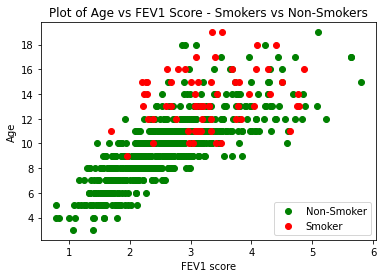

In [8]:
plt.scatter(non_smokers[:,1], non_smokers[:,0], c="green", label = "Non-Smoker") #plot points for non-smokers
plt.scatter(smokers[:,1], smokers[:,0], c="red", label = "Smoker")# plot for smokers
plt.title('Plot of Age vs FEV1 Score - Smokers vs Non-Smokers')
plt.xlabel('FEV1 score')
plt.ylabel('Age')
plt.legend(loc='lower right')
plt.show()

The correlation value comes out to be positive, which means that the age and FEV1 score are directly propotional. An increase in age generally results in an increase in FEV1. This is further supported by the plot above. We can see a positive trend. The scatter plot moves in a diagnol direction.

# Excercise 5

Created a histogram over the age of subjects in each of the two groups

In [9]:
smokers_age = smokers[:,0] #extracting age from dataset
non_smokers_age = non_smokers[:,0]
np.unique(smokers_age)

array([ 9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

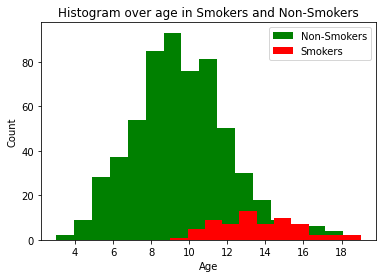

In [10]:
plt.hist(non_smokers_age, 17, color='green', label='Non-Smokers', align = 'mid') #plot non-smokers
plt.hist(smokers_age, 11, label='Smokers', color = 'red') #plot smokers
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram over age in Smokers and Non-Smokers')
plt.legend()
plt.show()

The first thing from the above histogram we can see is that non-smokers are much more in quantity than smokers. Secondly, smokers are comprised of the older age groups only. Since we know that age and FEV1 scores are correlated and that a higher age results in a higher FEV1 score the previous results make some sense in this context. This coupled with the fact that the datapoints for non-smokers(Approximately 10 times more datapoints than smokers) less than the age of 10 comprise almost 50% of the group of non-smokers (almost 0% for smokers) we can begin to understand why the average FEV1 score of non-smokers is lower than smokers.